# library

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import linecache

# Data set

In [22]:
df = pd.read_csv('Diamonds Prices2022.csv')

# BISNIS UNDERSTANDING
Pada tahap Pemahaman Bisnis ini, tujuannya adalah untuk memahami permasalahan yang dihadapi bisnis dalam meningkatkan akurasi estimasi harga berlian. Hal ini penting agar dapat memberikan informasi yang lebih tepat dan akurat kepada pelanggan, serta membantu perusahaan dalam pengambilan keputusan bisnis yang lebih baik.

# DATA UNDERSTANDING

price : harga dalam dolar AS (
18,823)

carat : berat berlian (0,2--5,01)

cut : kualitas potongan (Fair, Good, Very Good, Premium, Ideal)

color : warna berlian, dari J (terburuk) hingga D (terbaik)

clarity : pengukuran seberapa jelas berlian itu (I1 (terburuk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))

x : Panjang dalam mm (0--10,74)

y : lebar dalam mm (0--58.9)

z : Kedalaman dalam mm (0--31.8)

depth : Persentase kedalaman total = z / mean (x, y) = 2 * z / (x + y) (43--79)

table : lebar bagian atas berlian relatif terhadap titik terlebar (43--95)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [24]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

menghapus kolom unnamed

In [25]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# DATA PREPARATION


In [26]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<Axes: >

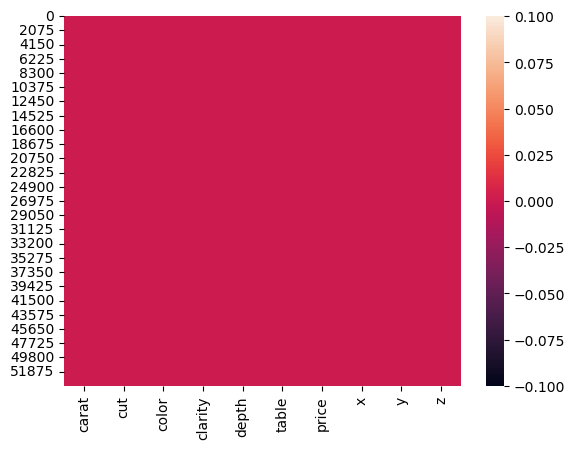

In [27]:
sns.heatmap(df.isnull())

In [28]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


C:\Users\Hp\AppData\Local\Temp\ipykernel_8980\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

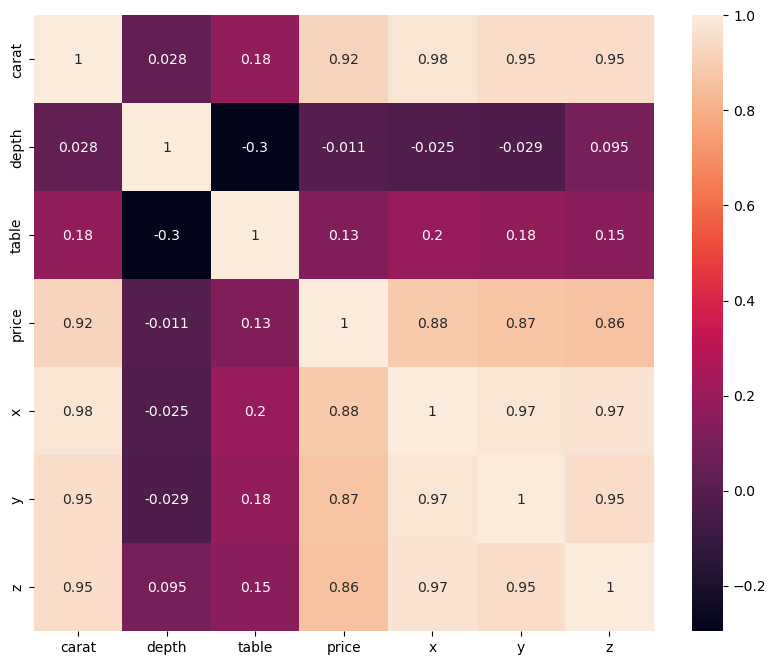

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Jumlah Diamond berdasar karat

In [30]:
models = df.groupby('carat').count()[['depth']].sort_values(by='depth',ascending=True).reset_index()
models = models.rename(columns={'depth':'numberOfdimond'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

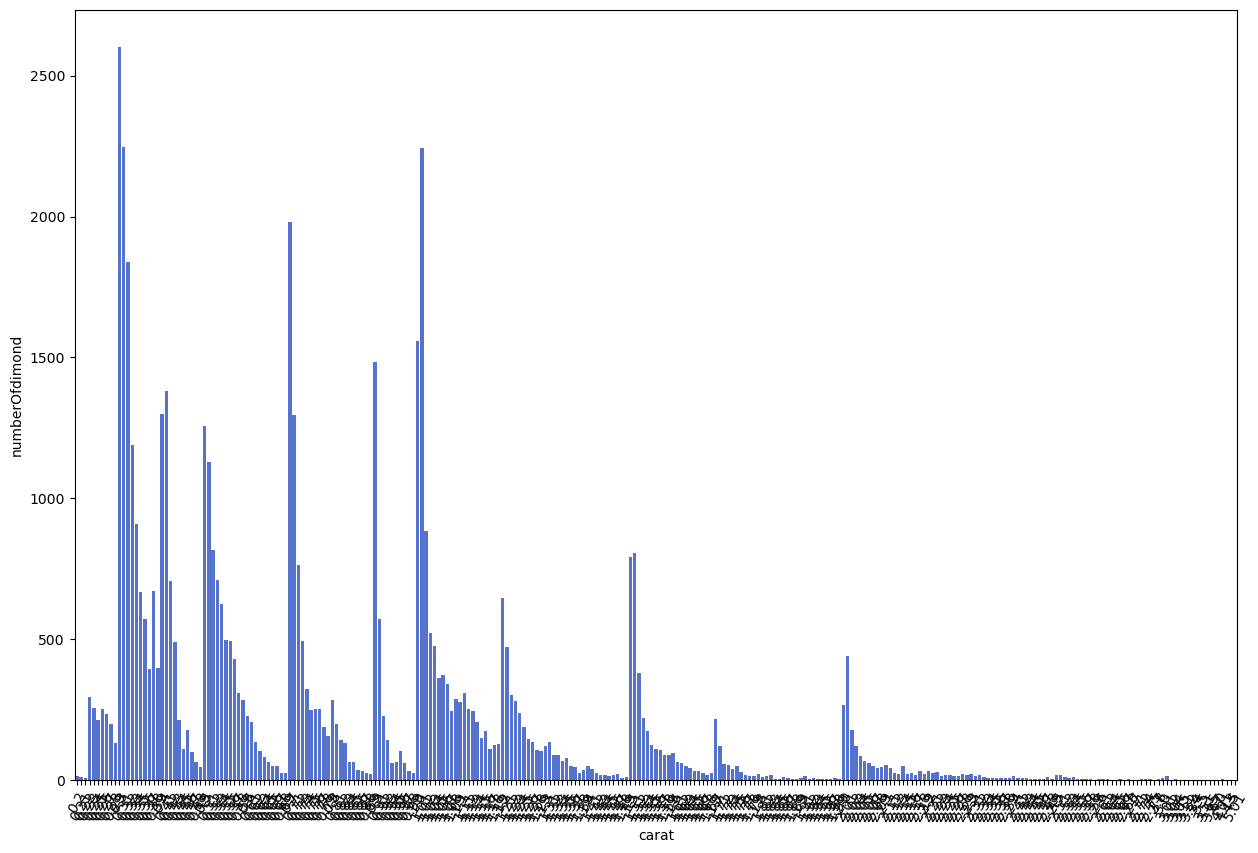

In [33]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x=models['carat'], y = models['numberOfdimond'], color='royalblue')
plt.xticks(rotation=60)

Distri Diamond

C:\Users\Hp\AppData\Local\Temp\ipykernel_8980\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

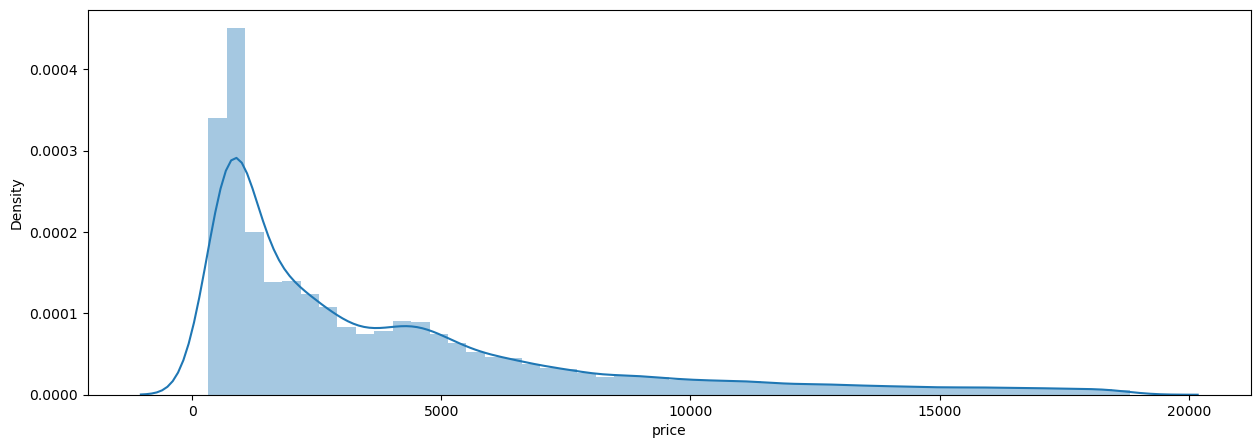

In [34]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# Modeling 
seleksi Fitur

In [35]:
features = ['carat','depth','table','x','y','z']
x = df[features]
y = df['price']
x.shape, y.shape

((53943, 6), (53943,))

Split data training dan data testing

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=60)
y_test.shape

(13486,)

Membuat Regresi Linier

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

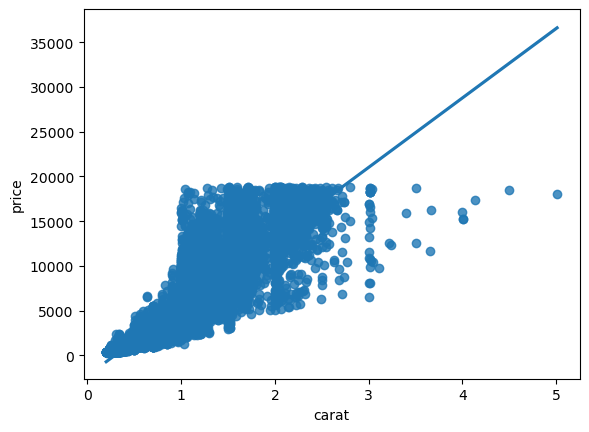

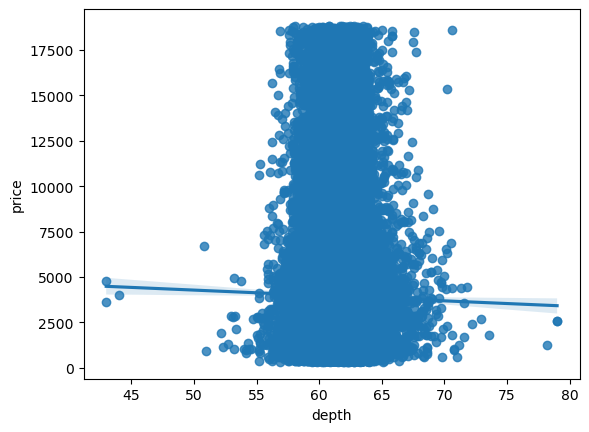

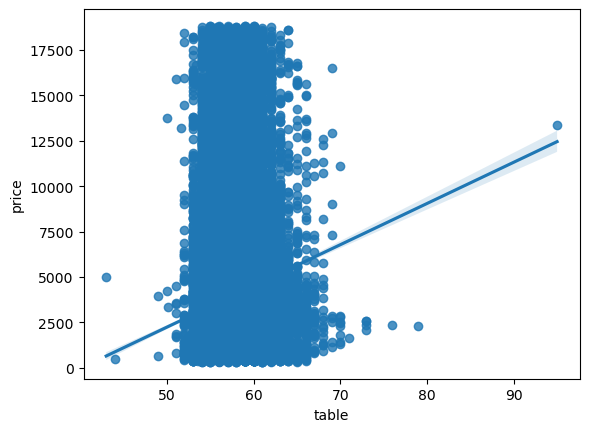

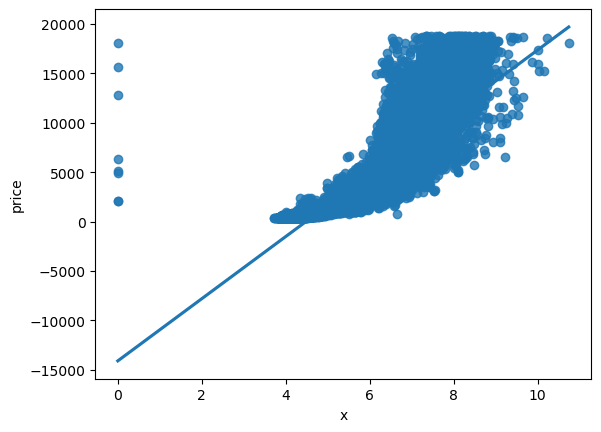

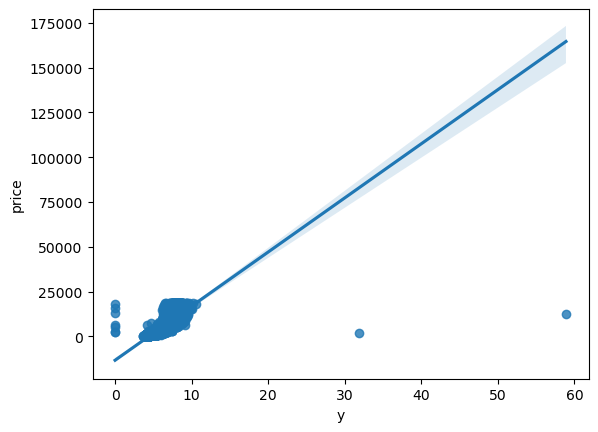

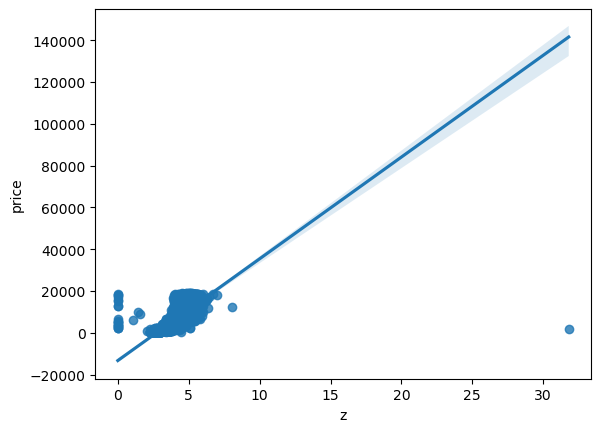

In [39]:
for features in df:
    if features in ['price','cut','color','clarity']:
        continue
    
    sns.regplot(y=df['price'],x=df[features])
    plt.show()

# Evaluasi

In [40]:
score = lr.score(x_test,y_test)
print('Akurasi model Regresi Linear', score)

Akurasi model Regresi Linear 0.8530246313402056


# Membuaat input Regresi Linier

In [41]:
input_data = np.array([[0.23,61.5,55,3.95,3.98,2.48]])

prediction = lr.predict(input_data)
print('Estimasi Harga Diamond adalah :',prediction)

Estimasi Harga Diamond adalah : [334.36053307]


c:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Deployment

In [42]:
import pickle
filename = ('estimasi_harga_diamond.sav')
pickle.dump(lr,open(filename,'wb'))